<a href="https://colab.research.google.com/github/LukeBlanch/CAP4630-Artificial-Intelligence/blob/master/HW_3/HW_3_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 Problem 2:
## Luke Blanchard

## Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

## Define parameters:

In [0]:
w = 1
b = 1
mu = .7
sigma = .2
m = 500

## get_random_data

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m,2))
  labels = np.empty((m,1))

  for i in range(m):
    # Let the class label be 0 or 1 with equal probability
    labels[i] = random.randint(0,1)
    # Let x_1 be random between [0, 1)
    data[i][0] = random.random()
    # Calculate x_2 from x_1 and given parameters
    data[i][1] = w * data[i][0] + b + pow(-1, labels[i]) * np.random.default_rng().normal(mu, sigma)
    
  train_data = data[0:int(m*.8)]
  train_labels = labels[0:int(m*.8)]
  test_data = data[int(m*.8):m]
  test_labels = labels[int(m*.8):m]

  return (train_data, train_labels, test_data, test_labels)

## display_random_data

In [0]:
def display_random_data(train_data, train_labels, test_data, test_labels):
  for i in range(len(train_labels)):
    if (train_labels[i] == 0):
      plt.scatter(train_data[i][0], train_data[i][1], c='b', s=10)
    else:
      plt.scatter(train_data[i][0], train_data[i][1], c='r', s=10)

  for i in range(len(test_labels)):
    if (test_labels[i] == 0):
      plt.scatter(test_data[i][0], test_data[i][1], c='b', s=10)
    else:
      plt.scatter(test_data[i][0], test_data[i][1], c='r', s=10)

  x = np.array(range(0,2))  
  y = eval('w * x + b')
  plt.plot(x, y,'green')  


## Build the model

In [0]:
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model

## Train the model

In [160]:
train_data, train_labels, test_data, test_labels = get_random_data(w, b, mu, sigma, m)

model = build_and_compile_model()

history = model.fit(train_data,
                    train_labels,
                    epochs=16,
                    batch_size=8)

Epoch 1/16
50/50 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5675
Epoch 2/16
50/50 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.9700
Epoch 3/16
50/50 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.9825
Epoch 4/16
50/50 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.9800
Epoch 5/16
50/50 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.9900
Epoch 6/16
50/50 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.9900
Epoch 7/16
50/50 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.9900
Epoch 8/16
50/50 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.9900
Epoch 9/16
50/50 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.9950
Epoch 10/16
50/50 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.9975
Epoch 11/16
50/50 [

## Test the model

In [161]:
results = model.evaluate(test_data, test_labels)
results

4/4 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 1.0000


[0.14291642606258392, 1.0]

## Display the data:
### The green line is the line used to generate the data, and the black line is the one produced by the trained model

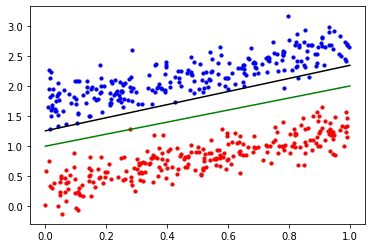

In [162]:
display_random_data(train_data, train_labels, test_data, test_labels)
weights = model.get_weights()
w1 = weights[0][0]
w2 = weights[0][1]
bias = weights[1]
x = np.array([0,0.0625,0.0625*2,0.0625*3,0.0625*4,0.0625*5,0.0625*6,0.0625*7,0.0625*8,0.0625*9,0.0625*10,0.0625*11,0.0625*12,0.0625*13,0.0625*14,0.0625*16,])
y = eval('-(w1 * x + b) / w2')
for i in range(len(x)):
  y[i] = ((-1*(np.sum(w1) * x[i] + np.sum(bias))) / np.sum(w2))

plt.plot(x,y,'black')

